In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
pd.pandas.set_option('display.max_columns',None)

In [250]:
df=pd.read_excel(r"D:\Users\abhisv\Desktop\Historical Product Demand.xlsx")

In [251]:
df.shape

(6271, 5)

In [252]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [253]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_1295,Whse_J,Category_019,2012-03-26,10000
1,Product_1377,Whse_J,Category_019,2012-03-26,5000
2,Product_1378,Whse_J,Category_019,2012-03-26,10000
3,Product_1382,Whse_J,Category_019,2012-03-26,5000
4,Product_1452,Whse_J,Category_019,2012-03-26,5000


In [254]:
df.dtypes

Product_Code                object
Warehouse                   object
Product_Category            object
Date                datetime64[ns]
Order_Demand                 int64
dtype: object

In [255]:
df['Product_Code'].nunique(),df['Warehouse'].nunique(),df['Product_Category'].nunique()

(495, 2, 21)

In [256]:
#Lets split the date interms of Day,Month,Year
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [257]:
df.drop(['Date','Product_Code'],axis=1,inplace=True)

In [258]:
df['Year'].unique()

array([2012, 2011], dtype=int64)

In [259]:
df.drop('Product_Category',axis=1,inplace=True)

In [260]:
#Lets see some distributions

In [261]:
def nulltreat(df):
    nullvaluetable=df.isna().sum()/df.shape[0]*100
    print('The total columns are',len(nullvaluetable))
    print('The columns are ',nullvaluetable)
    drop_cols=nullvaluetable[nullvaluetable>30].index
    print('The columns to be dropped are',len(drop_cols))
    print('The columns to be dropped are:',drop_cols)
    retained_cols=nullvaluetable[nullvaluetable<30].index
    print('The columns to be retained are',retained_cols)
    numerical=[feature for feature in df if df[feature].dtypes!='O']
    print('The numerical columns are', numerical)
    categorical=[feature for feature in df if df[feature].dtypes=='O']
    print('The categorical columns are',categorical)
    #Lets check the discrete and continous variables in numerical
    numerical_continous=[feature for feature in numerical if len(df[feature].unique())>25]
    print('The numerical_continous columns are',numerical_continous)
    numerical_discrete=[feature for feature in numerical if len(df[feature].unique())<25]
    print('The numerical_discrete columns are',numerical_discrete)
    return drop_cols,retained_cols,numerical,categorical,numerical_continous,numerical_discrete

In [262]:
drop_cols,retained_cols,numerical,categorical,numerical_continous,numerical_discrete=nulltreat(df)

The total columns are 5
The columns are  Warehouse       0.0
Order_Demand    0.0
Day             0.0
Month           0.0
Year            0.0
dtype: float64
The columns to be dropped are 0
The columns to be dropped are: Index([], dtype='object')
The columns to be retained are Index(['Warehouse', 'Order_Demand', 'Day', 'Month', 'Year'], dtype='object')
The numerical columns are ['Order_Demand', 'Day', 'Month', 'Year']
The categorical columns are ['Warehouse']
The numerical_continous columns are ['Order_Demand', 'Day']
The numerical_discrete columns are ['Month', 'Year']


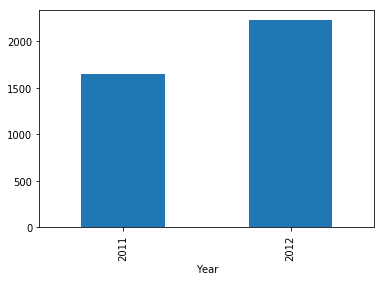

In [263]:
df.groupby('Year')['Order_Demand'].mean().plot.bar()

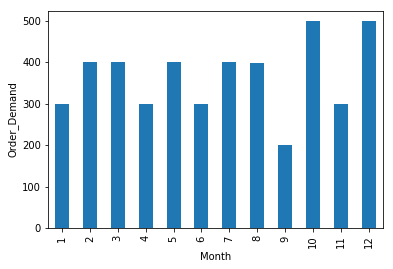

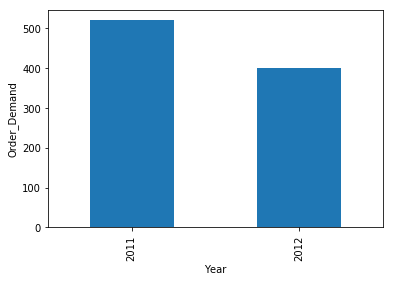

In [264]:
#Lets find relationship between numerical_discrete and order_demand
for feature in numerical_discrete:
    data=df.copy()
    data.groupby(feature)['Order_Demand'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Order_Demand')
    plt.show()

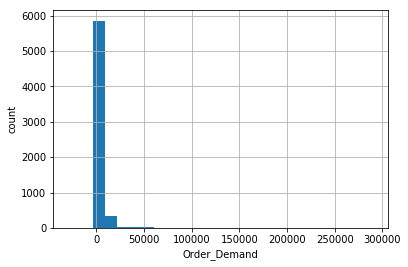

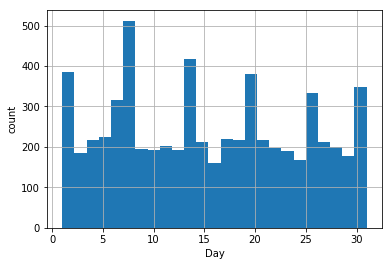

In [265]:
#Lets understand the distribution of continous variable with Order Demand
for feature in numerical_continous:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

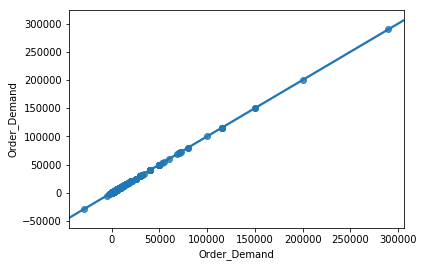

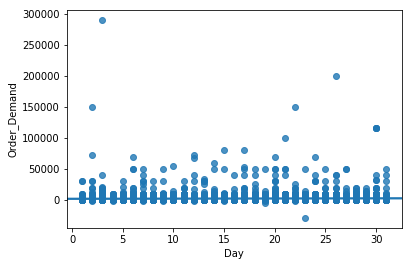

In [266]:
for feature in numerical_continous:
    data=df.copy()
    sns.regplot(data[feature],data['Order_Demand'])
    plt.xlabel(feature)
    plt.ylabel('Order_Demand')
    plt.show()

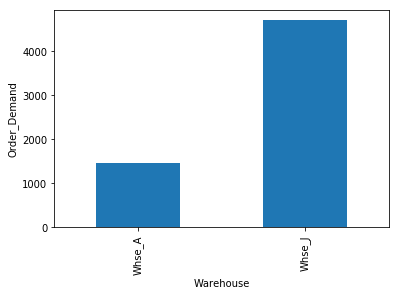

In [267]:
for feature in categorical:
    data=df.copy()
    data.groupby(feature)['Order_Demand'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Order_Demand')
    plt.show()

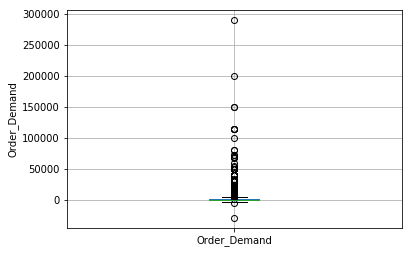

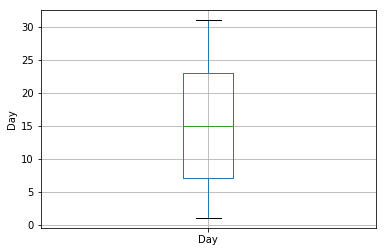

In [268]:
for feature in numerical_continous:
    data=df.copy()
    data.boxplot(column=feature)
    plt.ylabel(feature)
    plt.show()

In [269]:
df['Order_Demand']=df['Order_Demand'].astype('str')

In [270]:
df['Order_Demand'].dtype

dtype('O')

In [271]:
df['Order_Demand'].value_counts()

0        767
1000     645
500      367
2000     361
5000     308
100      264
10000    255
200      255
3000     185
10       167
1        165
50       158
2        157
300      154
20       139
400      125
600       90
4         83
3         80
5         74
2500      74
4000      60
6         49
250       48
30        47
1500      46
40        39
6000      35
800       33
20000     30
        ... 
552        1
480        1
168        1
17500      1
55         1
9100       1
-90        1
79         1
436        1
-5000      1
360        1
275        1
-1200      1
1038       1
1350       1
31000      1
720        1
14300      1
-360       1
9900       1
3900       1
-5         1
626        1
71         1
1950       1
-3         1
54400      1
2676       1
190        1
4350       1
Name: Order_Demand, Length: 317, dtype: int64

In [272]:
df.Order_Demand=df.Order_Demand.map(lambda x:x.lstrip('-'))

In [280]:
#Lets remove outliers
def outliers(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3-Q1
        LTV=Q1-1.5*IQR
        UTV=Q3+1.5*IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j<LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p

In [281]:
outliers(df)

In [282]:
df.Order_Demand.dtypes

dtype('float64')

In [283]:
df.head(2)

,Warehouse,Order_Demand,Day,Month,Year
0,Whse_J,400.0,26,3,2012.0
1,Whse_J,400.0,26,3,2012.0


In [284]:
df.dtypes

Warehouse        object
Order_Demand    float64
Day               int64
Month             int64
Year            float64
dtype: object

In [285]:
df.Order_Demand=df.Order_Demand.astype('int64')

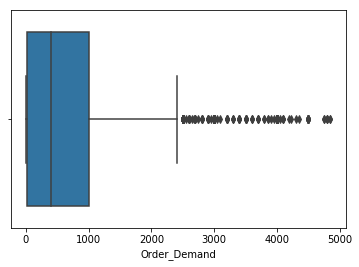

In [286]:
sns.boxplot(df.Order_Demand)

In [287]:
#Feature extraction

In [288]:
df.Warehouse.value_counts()

Whse_A    4785
Whse_J    1486
Name: Warehouse, dtype: int64

In [289]:
df=pd.get_dummies(df,'Warehouse',drop_first=True)

In [290]:
df.head()

,Order_Demand,Day,Month,Year,Warehouse_Whse_J
0,400,26,3,2012.0,1
1,400,26,3,2012.0,1
2,400,26,3,2012.0,1
3,400,26,3,2012.0,1
4,400,26,3,2012.0,1


In [291]:
#Feature scaling, as far now the values are not heavy, so not doing scaling

In [292]:
y=pd.DataFrame(df.iloc[:,0])
x=df.iloc[:,1:]

In [293]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [294]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_train)

In [295]:
from sklearn.metrics import r2_score
score=r2_score(y_train,y_pred)
score

0.006542866593417407

In [296]:
lr.coef_

array([[  0.42010868,  -2.69171011,   0.        , 166.94157009]])

In [297]:
lr.intercept_

array([585.51372456])

In [306]:
residual=y_train-y_pred

In [299]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=x_train.columns).T

,Day,Month,Year,Warehouse_Whse_J
vif,1.000951,1.014787,7.842196,1.01536


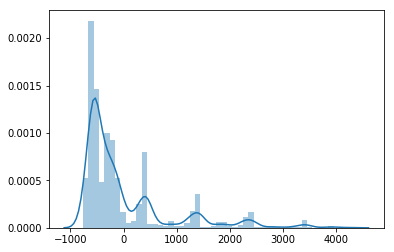

In [300]:
sns.distplot(residual)

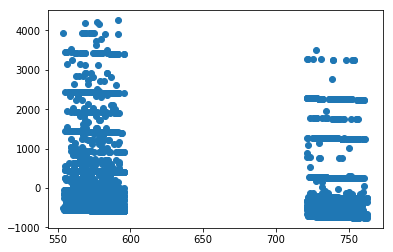

In [301]:
plt.scatter(y_pred,residual)

In [302]:
import statsmodels.api as sm

In [303]:
X=sm.add_constant(x_train)
model=sm.OLS(y_train,x_train)

In [304]:
results=model.fit()
results.params

Day                   0.420109
Month                -2.691710
Year                  0.291011
Warehouse_Whse_J    166.941570
dtype: float64

In [305]:
print(results.summary())# R2 value closer to 1, then our model really fits well.

                            OLS Regression Results                            
Dep. Variable:           Order_Demand   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     10.32
Date:                Wed, 19 Aug 2020   Prob (F-statistic):           9.15e-07
Time:                        17:07:12   Log-Likelihood:                -38532.
No. Observations:                4703   AIC:                         7.707e+04
Df Residuals:                    4699   BIC:                         7.710e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Day                  0.4201      1.448  